# READ-ME
This is a the a Google Colab notebook for the class **Machine Learning in Bioinformatics**. The runtime type of this notebook is `Python`.

## Before anything else

You must look for the newest version of this course's syllabus and read it.

## Class details

- University: University of North Carolina at Charlotte (UNC Charlotte)
- College: College of Computing and Informatics
- Department: Department of Bioinformatics and Statistics
- Code: BINF 6210 / BINF 8210
- Name: Machine Learning for Bioinformatics (Machine Learning for Bioinformatics - 12328 - BINF 6210 - 001/ Machine Learning for Bioinformatics - 12329 - BINF 8210 - 001)
- Instructor: Denis Jacob Machado, Ph.D.
- Instructor's email: dmachado@uncc.edu
- Instructor's phone: 704-687-5765 (this number may change, please check for updates)
- Instructor's office: BINF 453
- Locality: UNC Charlotte's Department of Bioinformatics and Genomics, room 301
- Time: 1:00 pm to 2:15 pm
- Date range: Aug 22, 2022 - Dec 15, 2022 (for approximately 16 weeks)
- Days of the week: TR (Tuesdays and Thursdays)
- Lecture Schedule Type/ Instructional Method: Face-to-Face Instruction Instructional Method
- Credits: 3.0 [credit hours](https://provost.charlotte.edu/policies-procedures/academic-policies-and-procedures/academic-credit-hour) (2,250 minutes of classroom or direct faculty instruction plus 4,500 minutes of out of class student work).

## Copyright

The instructor's lectures and course materials, including presentations, tests, exams, outlines, and similar materials, are protected by copyright. The instructor is the exclusive owner of copyright in those materials the instructor has created. The instructor encourage students to take notes and make copies of course materials for their educational use. However, students may not, nor may they knowingly allow others to reproduce or distribute lecture notes and course materials publicly without the instructor's express written consent. This includes providing materials to commercial course material suppliers such as CourseHero, Chegg, and other similar services. Students who publicly distribute or display or help others publicly distribute or display copies or modified copies of an instructor's course materials may be in violation of University Policy 406, The Code of Student Responsibility. Similarly, students own copyright in their original papers and exam essays. If the instructor is interested in posting the student's answers or papers on the course web site, the instructor will request the student's written permission.

# Reference

This notebook is based on "One-class SVM with non-linear kernel (RBF)" by SciKit-Learn (available at https://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html, last accessed on November 28, 2022).

# One-class SVM with non-linear kernel (RBF)

In here we will see an example using a **one-class SVM** for novelty detection.

**One-class SVM** is an **unsupervised** algorithm that learns a decision function for **novelty detection**: classifying new data as similar or different to the training set.

In [1]:
#@title Get the dependencies
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

In [2]:
#@title Generate the training ans the testing (sometimes called "validation") data
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

In [9]:
#@title Take a look at the data
print("> This is how the test data looks like: \n{}\n".format(xx[:5]))
print("> This is how the labels looks like:\n{}\n".format(yy[:5]))
print("> This is how the test data looks like:\n{}\n".format(X_test[:5]))
print("> This is how the outliers look like:\n{}\n".format(X_outliers[:5]))

> This is how the test data looks like: 
[[-5.         -4.97995992 -4.95991984 ...  4.95991984  4.97995992
   5.        ]
 [-5.         -4.97995992 -4.95991984 ...  4.95991984  4.97995992
   5.        ]
 [-5.         -4.97995992 -4.95991984 ...  4.95991984  4.97995992
   5.        ]
 [-5.         -4.97995992 -4.95991984 ...  4.95991984  4.97995992
   5.        ]
 [-5.         -4.97995992 -4.95991984 ...  4.95991984  4.97995992
   5.        ]]

> This is how the labels looks like:
[[-5.         -5.         -5.         ... -5.         -5.
  -5.        ]
 [-4.97995992 -4.97995992 -4.97995992 ... -4.97995992 -4.97995992
  -4.97995992]
 [-4.95991984 -4.95991984 -4.95991984 ... -4.95991984 -4.95991984
  -4.95991984]
 [-4.93987976 -4.93987976 -4.93987976 ... -4.93987976 -4.93987976
  -4.93987976]
 [-4.91983968 -4.91983968 -4.91983968 ... -4.91983968 -4.91983968
  -4.91983968]]

> This is how the test data looks like:
[[1.93300187 2.08581364]
 [2.12890744 2.00860036]
 [1.79550261 1.91809181]
 

In [5]:
#@title Fit the model
#@markdown The function `svm.OneClassSVM()` is used for unsupervised outlier detection. It estimates the support of a high-dimensional distribution. Its implementation is based on `libsvm`. Read more in this [user guide](https://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection).
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)

In [ ]:
#@title Run some predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [19]:
#@title Calculate the error in t he training, testing, and outlier data sets
n_error_train = y_pred_train[y_pred_train == -1].size
print("> The size of the error in the training set is {}. This is how it looks like: \n{}\n".format(n_error_train, y_pred_train[y_pred_train == -1]))
n_error_test = y_pred_test[y_pred_test == -1].size
print("> The size of the error in the testing set is {}. This is how it looks like: \n{}\n".format(n_error_test, y_pred_test[y_pred_test == -1]))
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
print("> The size of the error in the outlier set is {}. This is how it looks like: \n{}\n".format(n_error_outliers, y_pred_outliers[y_pred_outliers == 1]))

> The size of the error in the training set is 20. This is how it looks like: 
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]

> The size of the error in the testing set is 6. This is how it looks like: 
[-1 -1 -1 -1 -1 -1]

> The size of the error in the outlier set is 1. This is how it looks like: 
[1]



In [ ]:
#@title Prepare the data for plotting
#@markdown The function `clf.decision_function()` signs distance to the separating hyperplane. Signed distance is positive for an inlier and negative for an outlier.
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#@markdown The function `reshape()` gives a new shape to an `numpy` array without changing its data.
Z = Z.reshape(xx.shape)

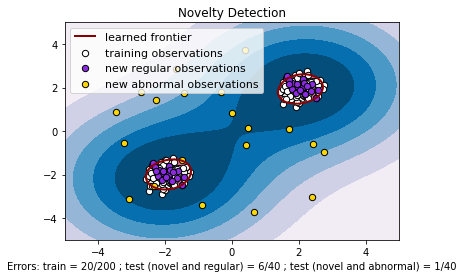

In [18]:
#@title Plot the line, the points, and the nearest vectors to the plane
#@markdown The data that we are plotting is split into training data and testing data (what some people call "validation" data). The testing data is of two types. First, novel and regular data. Second, novel and abnormal data (the outliers). Note that we have already determined the error size in "train," "test," and "outlier" above (20, 6, and 1, respectivelly). Pay attention to how that is show in the label below the X-axis.

# Create the plot:
plt.title("Novelty Detection")

# Contour and contourf draw contour lines and filled contours, respectively:
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

# Create the scatterplots:
s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))

# Change the plot's legend:
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)

# Change the plot's labels:
plt.xlabel(
    "Errors: train = %d/200 ; test (novel and regular) = %d/40 ; test (novel and abnormal) = %d/40"
    % (n_error_train, n_error_test, n_error_outliers)
)

# Print the plot to the screen:
plt.show()